<a href="https://colab.research.google.com/github/GMxGODSON/MBTI-Personality-Prediction-/blob/main/MBIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving mbti_1.csv to mbti_1.csv
Dataset loaded successfully.
Shape: (8675, 2)
✅ Accuracy Score: 0.6414985590778098

✅ Classification Report:

              precision    recall  f1-score   support

        ENFJ       0.64      0.22      0.33        41
        ENFP       0.67      0.56      0.61       125
        ENTJ       0.72      0.41      0.52        44
        ENTP       0.66      0.57      0.61       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       0.67      0.13      0.22        15
        INFJ       0.64      0.68      0.66       288
        INFP       0.62      0.84      0.71       370
        INTJ       0.61      0.69      0.65       193
        INTP       0.65      0.77      0.71       293
        ISFJ       0.92      0.27      0.41        45
        ISFP       0.71      0.32      0.44        53
        ISTJ       0.72      0.30      0.42    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


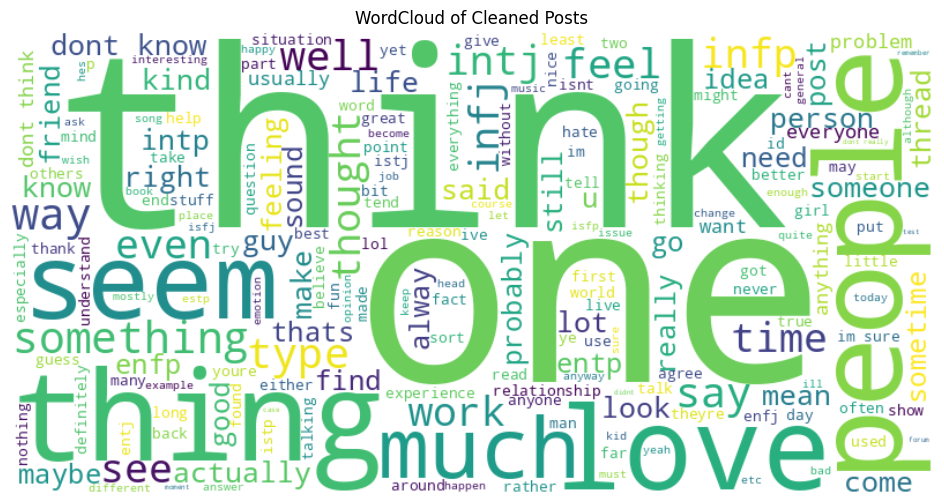

In [2]:
# Personality Prediction using MBTI Dataset
# -----------------------------------------

# ✅ Step 1: Install Required Libraries
!pip install nltk scikit-learn wordcloud

# ✅ Step 2: Import Libraries
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# ✅ Step 3: Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# ✅ Step 4: Upload Dataset (upload mbti_1.csv)
from google.colab import files
uploaded = files.upload()

# ✅ Step 5: Load Dataset
df = pd.read_csv("mbti_1.csv")
print("Dataset loaded successfully.")
print("Shape:", df.shape)
df.head()

# ✅ Step 6: Data Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

df["clean_posts"] = df["posts"].apply(clean_text)

# ✅ Step 7: Encode Personality Labels
le = LabelEncoder()
df["label"] = le.fit_transform(df["type"])

# ✅ Step 8: Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df["clean_posts"]).toarray()
y = df["label"]

# ✅ Step 9: Split Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 10: Train Logistic Regression Model
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

# ✅ Step 11: Evaluate the Model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy Score:", acc)
print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ✅ Step 12: WordCloud Visualization (optional for report)
text = " ".join(df["clean_posts"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Cleaned Posts")
plt.show()
